Title
"Exploring Shopping Behavior on an E-commerce Platform (Instacart)"


This project aims to analyze and understand customers' shopping behavior on an e-commerce platform (Instacart) using data provided in five CSV files. The project explores various aspects of customer orders, such as the preferred time and day for shopping, waiting times between orders, customer segmentation based on order frequency, and the typical number of items purchased per order. The analysis provides valuable insights into customer preferences and patterns, helping the platform make data-driven decisions to enhance the shopping experience.
Additionally, it sheds light on the variability in customer engagement, with occasional and loyal shoppers constituting distinct customer segments. Furthermore, by examining the typical number of items purchased per order, this analysis provides a holistic view of user behaviors, aiding the platform in optimizing its offerings and shopping experience for diverse customer needs.

In [1]:
import pandas as pd
import numpy as np

In [2]:
orders_file = "/datasets/instacart_orders.csv"
products_file = "/datasets/products.csv"
aisles_file = "/datasets/aisles.csv"
departments_file = "/datasets/departments.csv"
order_products_file = "/datasets/order_products.csv"

In [3]:
# Read the CSV file with the correct delimiter (';')
order_products = pd.read_csv("/datasets/order_products.csv", sep=';')
order_products.sample(5)



,order_id,product_id,add_to_cart_order,reordered
2863407,1424333,31343,3.0,1
156633,381496,17944,49.0,0
4539319,3349028,28204,15.0,1
3469803,593265,4605,6.0,1
3896741,1190792,20113,10.0,0


In [4]:
order_products.shape

(4545007, 4)

In [5]:
order_products.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
aisles = pd.read_csv("/datasets/aisles.csv",sep=';')
aisles.sample(5)

,aisle_id,aisle
114,115,water seltzer sparkling water
62,63,grains rice dried goods
102,103,ice cream toppings
16,17,baking ingredients
91,92,baby food formula


In [7]:
aisles.shape

(134, 2)

In [8]:
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
departments = pd.read_csv("/datasets/departments.csv",sep=';')
departments.sample(5)

,department_id,department
0,1,frozen
18,19,snacks
19,20,deli
3,4,produce
9,10,bulk


In [10]:
departments.shape

(21, 2)

In [11]:
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [12]:
instacart_orders = pd.read_csv("/datasets/instacart_orders.csv",sep=';')
instacart_orders.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
124160,2539510,1916,22,6,12,9.0
79101,2363776,34190,4,5,14,30.0
114181,273685,125118,22,4,10,3.0
22300,2967499,65476,10,4,18,4.0
115901,2333877,80146,18,3,20,3.0


In [13]:
instacart_orders.shape

(478967, 6)

In [14]:
instacart_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [15]:
products = pd.read_csv("/datasets/products.csv",sep=';')
products.sample(5)

,product_id,product_name,aisle_id,department_id
38096,38097,Slim Espresso Bar,3,19
17070,17071,Surfer Cooler Juice Drink,98,7
14545,14546,NaN,100,21
15707,15708,Lime Tangerine Yerba Mate Shot,47,11
37007,37008,Hot Bean Dip with Jalapenos Peppers,51,13


In [16]:
products.shape

(49694, 4)

In [17]:
products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [18]:
# Check for duplicated orders
duplicated_orders = instacart_orders[instacart_orders.duplicated(subset='order_id')]
duplicated_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [19]:
# Check for all orders placed Wednesday at 2:00 AM
# Filter for orders placed on Wednesdays at 2:00 AM
wednesday_2_am_orders = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
# Display the resulting orders
display(wednesday_2_am_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


**AS WE CAN CLEARLY SEEN FROM THE DATAFRAME THAT TOTAL NUMBER OF ORDERS PLACED ON WEDNESDAY AT 2 A.M ARE *(106)*.HERE EACH ROW REPRESENTS THE 1 DISTICT ORDER**

In [21]:
# Remove duplicate orders
# There are 15 rows in this overall data set which are duplicated
instacart_orders.duplicated().sum()

15

In [22]:
# Remove duplicate orders by using pandas function of drop_duplicate
instacart_orders.drop_duplicates(inplace=True)

#**REASON TO REMOVE DUPLICATE INSTACART ORDERS**

#From **domain knowledge perspective** there is no need to contain those orders which are repetitive in nature as they can greatly impact our analysis results.
#From **literature perspective** removing duplicate Instacart orders is essential to ensure data accuracy, maintain consistency, improve efficiency, preserve data integrity, reduce noise, avoid bias, and facilitate clear reporting of our analysis results.

In [23]:
# Double check for duplicate rows
instacart_orders.duplicated().sum()
# As we can see now there are no more duplicated rows present in our data set

0

In [24]:
# Double check for duplicate order IDs only
duplicated_orders = instacart_orders[instacart_orders.duplicated(subset='order_id', keep=False)]
duplicated_orders
# now the duplicated rows present in order_id automatically removed by applying
# drop_duplicate method on complete data frame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [25]:
instacart_orders.shape
# 15 rows are removed now

(478952, 6)

### `products` data frame

In [26]:
# Check for fully duplicate rows
products.duplicated().sum()
# Here no row is duplicated in our data frame

0

In [27]:
# Check for just duplicate product IDs
duplicated_orders = products[products.duplicated(subset='product_id')]
duplicated_orders
# Here no row is duplicated in our column named "product_id" and it is sensible
# to say as well beacause every product has unique id in our dataframe

,product_id,product_name,aisle_id,department_id


In [28]:
# Check for just duplicate product names (convert names to lowercase to compare better)
# this code will convert the capital letters into small letters simply to enhance visibility of column
products['product_name'] = products['product_name'].str.lower()

duplicated_orders = products[products.duplicated(subset='product_name')]
duplicated_orders

# here 1361 product_name are dublicated

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [29]:
# Check for duplicate product names that aren't missing
duplicates_with_values = products[products['product_name'].duplicated(keep=False) & ~products['product_name'].isna()]
# Print the DataFrame containing duplicate product names with values
duplicates_with_values

,product_id,product_name,aisle_id,department_id
41,42,biotin 1000 mcg,47,11
185,186,fresh scent dishwasher detergent with dawn,74,17
515,516,american cheese slices,21,16
1538,1539,cauliflower head,83,4
1783,1784,nutrition protein mix blueberry nut,117,19
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [30]:
products.shape
# It is the same as original data frame

(49694, 4)

### `departments` data frame

In [31]:
departments.duplicated().sum()
# no dublicated rows are present

0

### `aisles` data frame

In [32]:
aisles.duplicated().sum()
# no dublicated rows are present

0

### `order_products` data frame

In [33]:
# Check for fullly duplicate rows
order_products.duplicated().sum()
# no duplicate row present in whole dataset

0

In [34]:
# Double check for any other tricky duplicates
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [35]:
order_products.shape

(4545007, 4)

In [36]:
# Specify the columns you want to check for duplicates within
columns_of_interest = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

# Loop through the specified columns and display any duplicates
for column in columns_of_interest:
    duplicates = order_products[order_products.duplicated(subset=[column])]
    if not duplicates.empty:
        display(f"Duplicates in column '{column}':")
        display(duplicates)

"Duplicates in column 'order_id':"

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


"Duplicates in column 'product_id':"

,order_id,product_id,add_to_cart_order,reordered
19,2500729,21616,5.0,1
20,1687771,22963,5.0,1
75,2186234,13176,2.0,1
78,145751,47626,8.0,1
80,497429,26209,9.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


"Duplicates in column 'add_to_cart_order':"

,order_id,product_id,add_to_cart_order,reordered
2,2261212,26683,1.0,1
6,644579,12341,5.0,1
9,420019,23315,4.0,1
12,522547,40571,10.0,1
14,1961225,37553,1.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


"Duplicates in column 'reordered':"

,order_id,product_id,add_to_cart_order,reordered
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Find and remove missing values


### `products` data frame

In [37]:
products.isnull().mean()*100
# only product name contains the missing values

product_id       0.000000
product_name     2.531493
aisle_id         0.000000
department_id    0.000000
dtype: float64

In [38]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names_with_aisle_100 = products[products['product_name'].isna()]['aisle_id'] == 100

# Check if all missing product names are associated with aisle ID 100
are_all_missing_with_aisle_100 = missing_product_names_with_aisle_100.all()

print(are_all_missing_with_aisle_100)

True


In [39]:
# Are all of the missing product names associated with department ID 21?
missing_product_names_with_dept_21 = products[products['product_name'].isna()]['department_id'] == 21

# Check if all missing product names are associated with department ID 21
are_all_missing_with_dept_21 = missing_product_names_with_dept_21.all()

print(are_all_missing_with_dept_21)

True



#**Aisle:**

#An aisle is a physical space or walkway within the store that separates different sections or categories of products. Each aisle is usually labeled or numbered, making it easy for shoppers to locate specific types of items. For example, you might have an aisle for canned goods, an aisle for dairy products, an aisle for cleaning supplies, and so on.

#**Department:**

#A department is a broader category that encompasses a group of related products. Departments are usually organized around major product categories. For instance, common departments in a grocery store include the produce department (fruits and vegetables), the bakery department (bread and pastries), the meat department (meats and poultry), and so on.

In [41]:
products.isnull().mean()*100
# now we can see that the product name has no missing value

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

### `orders` data frame

In [42]:
instacart_orders.isnull().mean()*100
# only "days_since_prior_order" column has missing values

order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.016678
dtype: float64

In [43]:
# Are there any missing values where it's not a customer's first order?
missing_values_not_first_order = instacart_orders[instacart_orders['order_number'] != 1]['days_since_prior_order'].isna().any()
print(missing_values_not_first_order)

False


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done </div>

### `order_products` data frame

In [44]:
order_products.isnull().mean()*100
# only "add_to_cart_order" column contain 0.18% missing data

order_id             0.000000
product_id           0.000000
add_to_cart_order    0.018394
reordered            0.000000
dtype: float64

In [45]:
# What are the min and max values in this column?
min_add_to_cart_order = order_products['add_to_cart_order'].min()
max_add_to_cart_order = order_products['add_to_cart_order'].max()

print("Minimum add_to_cart_order:", min_add_to_cart_order)
print("Maximum add_to_cart_order:", max_add_to_cart_order)

Minimum add_to_cart_order: 1.0
Maximum add_to_cart_order: 64.0


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right </div>

In [46]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [47]:
orders_with_missing_values

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [48]:
# Do all orders with missing values have more than 64 products?

# Find orders with missing values in 'add_to_cart_order' and get their unique order IDs
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Group the relevant orders by 'order_id' and count the number of products in each order
order_counts = order_products[order_products['order_id'].isin(orders_with_missing_values)].groupby('order_id')['product_id'].count()

# Sort the counts and check if the minimum count is greater than or equal to 64
first_order_count = order_counts.min()
result = first_order_count >= 64

display(result)

True

In [49]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

In [50]:
order_products.isnull().mean()*100
# now there is no missing value in "add_to_cart_order"

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [51]:
order_products.head(2)
# now we can see that in "add_to_cart_order" column values are not decimal

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1


In [52]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [53]:
# Check the 'order_hour_of_day' values
hour_sensible = (instacart_orders['order_hour_of_day'] >= 0) & (instacart_orders['order_hour_of_day'] <= 23)

# Check the 'order_dow' values
dow_sensible = (instacart_orders['order_dow'] >= 0) & (instacart_orders['order_dow'] <= 6)

# Check if all values are sensible
are_all_sensible = hour_sensible.all() and dow_sensible.all()

print("Are all 'order_hour_of_day' values sensible?", hour_sensible.all())
print("Are all 'order_dow' values sensible?", dow_sensible.all())
print("Are all values sensible?", are_all_sensible)

Are all 'order_hour_of_day' values sensible? True
Are all 'order_dow' values sensible? True
Are all values sensible? True


### [A2] What time of day do people shop for groceries?

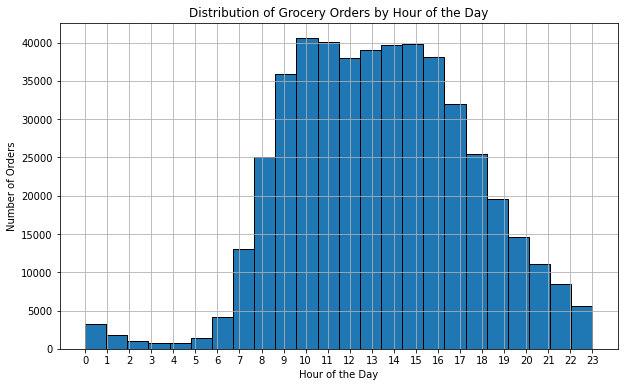

In [54]:
grocery_orders = instacart_orders

# Plot a histogram of 'order_hour_of_day'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(grocery_orders['order_hour_of_day'], bins=24, edgecolor='k')
plt.title('Distribution of Grocery Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### [A3] What day of the week do people shop for groceries?

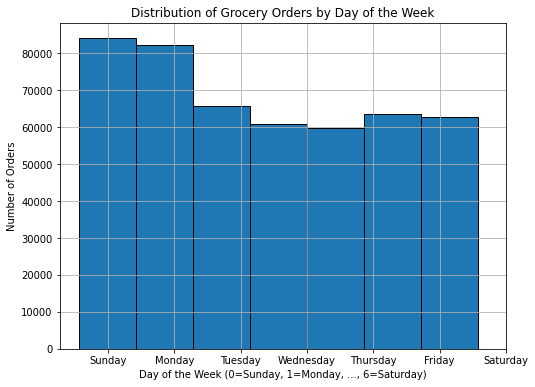

In [55]:
grocery_orders = instacart_orders

# Plot a histogram of 'order_dow' (day of the week)
plt.figure(figsize=(8, 6))
plt.hist(grocery_orders['order_dow'], bins=7, edgecolor='k', align='left')
plt.title('Distribution of Grocery Orders by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ..., 6=Saturday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.grid(True)
plt.show()

### [A4] How long do people wait until placing another order?

In [56]:
# Calculate the average waiting time
average_waiting_time = instacart_orders['days_since_prior_order'].mean()

# Calculate the median waiting time
median_waiting_time = instacart_orders['days_since_prior_order'].median()

display("Average Waiting Time: {:.2f} days".format(average_waiting_time))
display("Median Waiting Time: {:.2f} days".format(median_waiting_time))

'Average Waiting Time: 11.10 days'

'Median Waiting Time: 7.00 days'

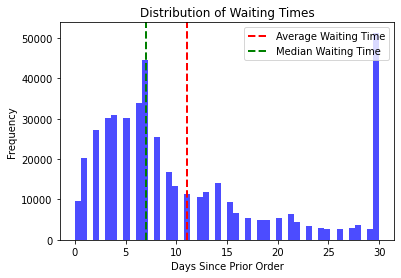

Average Waiting Time: 11.10 days
Median Waiting Time: 7.00 days


In [57]:
# Create a histogram to visualize the distribution of waiting times
plt.hist(instacart_orders['days_since_prior_order'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Times')
plt.axvline(average_waiting_time, color='red', linestyle='dashed', linewidth=2, label='Average Waiting Time')
plt.axvline(median_waiting_time, color='green', linestyle='dashed', linewidth=2, label='Median Waiting Time')
plt.legend()
plt.show()

print("Average Waiting Time: {:.2f} days".format(average_waiting_time))
print("Median Waiting Time: {:.2f} days".format(median_waiting_time))

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

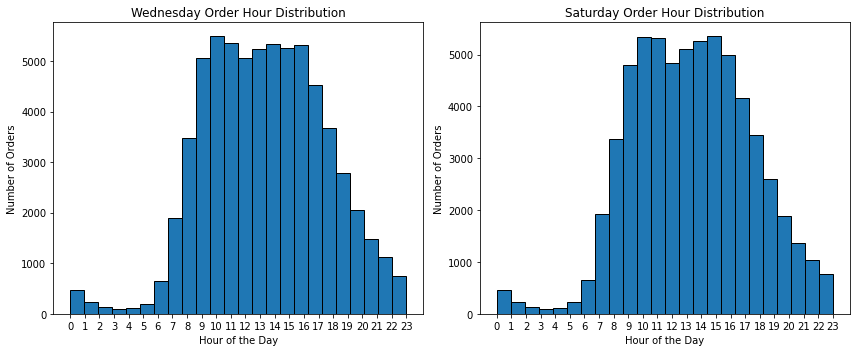

In [58]:
# Filter orders for Wednesdays (day 2) and Saturdays (day 5)
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 2]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 5]

# Create subplots for the histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Wednesdays
axs[0].hist(wednesday_orders['order_hour_of_day'], bins=24, edgecolor='k')
axs[0].set_title('Wednesday Order Hour Distribution')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Number of Orders')
axs[0].set_xticks(range(24))

# Plot histogram for Saturdays
axs[1].hist(saturday_orders['order_hour_of_day'], bins=24, edgecolor='k')
axs[1].set_title('Saturday Order Hour Distribution')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Number of Orders')
axs[1].set_xticks(range(24))

plt.tight_layout()
plt.show()

### [B2] What's the distribution for the number of orders per customer?

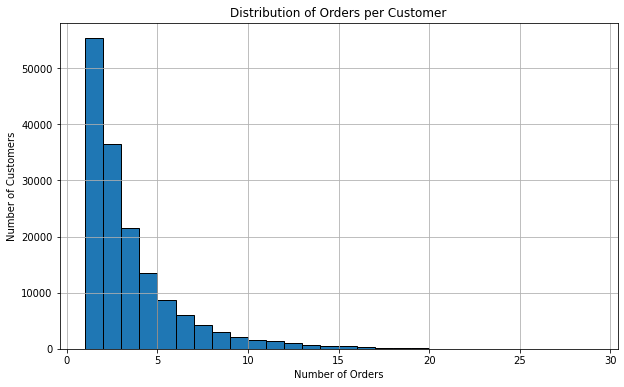

In [59]:
# Group orders by 'user_id' and count the number of unique orders for each customer
orders_per_customer = instacart_orders.groupby('user_id')['order_id'].nunique()

# Create a histogram without a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, max(orders_per_customer) + 2), edgecolor='k')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

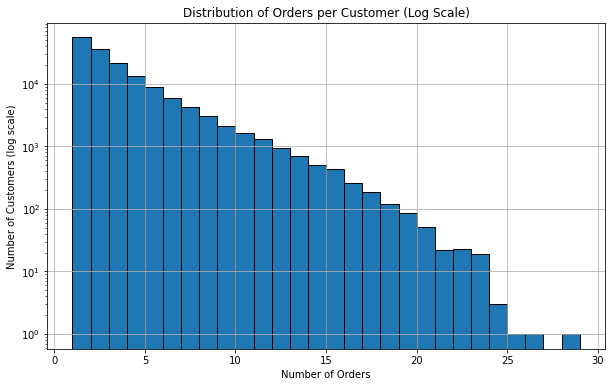

In [60]:
# Group orders by 'user_id' and count the number of unique orders for each customer
orders_per_customer = instacart_orders.groupby('user_id')['order_id'].nunique()

# Create a histogram with a logarithmic scale for the y-axis
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, max(orders_per_customer) + 2), edgecolor='k', log=True)
plt.title('Distribution of Orders per Customer (Log Scale)')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers (log scale)')
plt.grid(True)
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [61]:
# Count the number of times each product appears in orders
product_counts = order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

# Merge with the "products" dataframe to get product names
top_20_popular_products = product_counts.head(20).merge(products, on='product_id')

# Display the top 20 popular products with their IDs and names
display(top_20_popular_products[['product_id', 'product_name']])

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

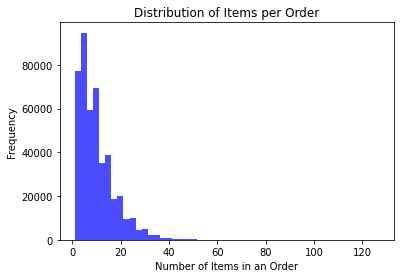

The average number of items people typically buy in one order is: 10.10


In [62]:
# Calculate the number of items in each order using product_id count
items_per_order = order_products.groupby('order_id')['product_id'].count()
average_items_per_order = items_per_order.mean()

# Plot the distribution of items per order
plt.hist(items_per_order, bins=50, color='blue', alpha=0.7)
plt.xlabel('Number of Items in an Order')
plt.ylabel('Frequency')
plt.title('Distribution of Items per Order')
plt.show()

print(f"The average number of items people typically buy in one order is: {average_items_per_order:.2f}")

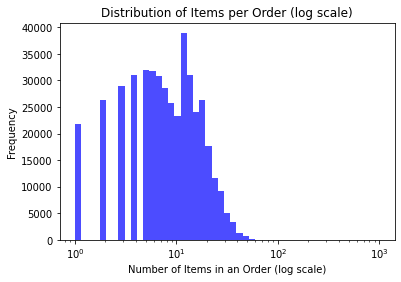

'The average number of items people typically buy in one order is: 10.24'

In [63]:
items_per_order = order_products.groupby('order_id')['add_to_cart_order'].max()
average_items_per_order = items_per_order.mean()

# Plot the distribution of items per order with a log scale
plt.hist(items_per_order, bins=np.logspace(0, np.log10(items_per_order.max()), 50), color='blue', alpha=0.7)
plt.xscale('log')  # Set the x-axis to a log scale
plt.xlabel('Number of Items in an Order (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Items per Order (log scale)')
plt.show()

display(f"The average number of items people typically buy in one order is: {average_items_per_order:.2f}")

In [64]:
 order_products.groupby('order_id')['add_to_cart_order'].max().sort_values(ascending = False)

order_id
1598369    999
1673227    999
1916118    999
1021563    999
1800005    999
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: add_to_cart_order, Length: 450046, dtype: int64

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [65]:
# Step 1: Merge dataframes to get product names and reorder information
merged_df = order_products.merge(products, on='product_id')

# Step 2: Calculate reorder frequency for each product
reorder_counts = merged_df.groupby(['product_id', 'product_name'])['reordered'].sum().reset_index()
reorder_counts.rename(columns={'reordered': 'reorder_frequency'}, inplace=True)

# Step 3: Sort products by reorder frequency in descending order
top_20_reordered = reorder_counts.sort_values(by='reorder_frequency', ascending=False).head(20)

# Step 4: Display the top 20 products with names, product IDs, and reorder frequencies
display(top_20_reordered[['product_id', 'product_name', 'reorder_frequency']])

,product_id,product_name,reorder_frequency
22808,24852,banana,55763
12025,13176,bag of organic bananas,44450
19370,21137,organic strawberries,28639
20077,21903,organic baby spinach,26233
43271,47209,organic hass avocado,23629
43788,47766,organic avocado,18743
25556,27845,organic whole milk,16251
43663,47626,large lemon,15044
25666,27966,organic raspberries,14748
15364,16797,strawberries,13945


### [C3] For each product, what proportion of its orders are reorders?

In [66]:
# Step 1: Merge the dataframes
merged_df = order_products.merge(products, on='product_id')

# Step 2: Calculate the total number of orders for each product
total_orders_per_product = merged_df.groupby('product_id')['order_id'].nunique().reset_index()
total_orders_per_product.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Step 3: Calculate the total number of reorder orders for each product
reorder_orders_per_product = merged_df[merged_df['reordered'] == 1].groupby('product_id')['order_id'].nunique().reset_index()
reorder_orders_per_product.rename(columns={'order_id': 'reorder_orders'}, inplace=True)

# Step 4: Calculate the proportion of reorders for each product
proportion_of_reorders = total_orders_per_product.merge(reorder_orders_per_product, on='product_id', how='left')
proportion_of_reorders['proportion_of_reorders'] = proportion_of_reorders['reorder_orders'] / proportion_of_reorders['total_orders']

# Display the result
display(proportion_of_reorders[['product_id', 'proportion_of_reorders']])

,product_id,proportion_of_reorders
0,1,0.564286
1,2,NaN
2,3,0.738095
3,4,0.510204
4,7,0.500000
...,...,...
45568,49690,0.800000
45569,49691,0.430556
45570,49692,0.416667
45571,49693,0.440000


### [C4] For each customer, what proportion of their products ordered are reorders?

In [67]:
# Step 1: Merge the dataframes
merged_df = order_products.merge(instacart_orders, on='order_id')

# Step 2: Calculate the total number of products ordered by each customer
total_products_per_customer = merged_df.groupby('user_id')['product_id'].count().reset_index()
total_products_per_customer.rename(columns={'product_id': 'total_products_ordered'}, inplace=True)

# Step 3: Calculate the total number of reorder products ordered by each customer
reorder_products_per_customer = merged_df[merged_df['reordered'] == 1].groupby('user_id')['product_id'].count().reset_index()
reorder_products_per_customer.rename(columns={'product_id': 'reorder_products_ordered'}, inplace=True)

# Step 4: Calculate the proportion of reorders for each customer
proportion_of_reorders = total_products_per_customer.merge(reorder_products_per_customer, on='user_id', how='left')
proportion_of_reorders['proportion_of_reorders'] = proportion_of_reorders['reorder_products_ordered'] / proportion_of_reorders['total_products_ordered']

# Display the result
display(proportion_of_reorders[['user_id', 'proportion_of_reorders']])

,user_id,proportion_of_reorders
0,2,0.038462
1,4,NaN
2,5,0.666667
3,6,NaN
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


### [C5] What are the top 20 items that people put in their carts first? 

In [68]:
# Filter rows where add_to_cart_order is 1
first_items = order_products[order_products['add_to_cart_order'] == 1]

# Group by product_id and calculate the count of occurrences (how many times it's put in carts first)
top_first_items = first_items['product_id'].value_counts().reset_index()
top_first_items.columns = ['product_id', 'count']

# Merge with the "products" dataframe to get the product names
top_first_items = top_first_items.merge(products, on='product_id')

# Display the top 20 items people put in their carts first
display(top_first_items.head(20)[['product_id', 'product_name']])

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,27845,organic whole milk
3,21137,organic strawberries
4,47209,organic hass avocado
5,21903,organic baby spinach
6,47766,organic avocado
7,19660,spring water
8,16797,strawberries
9,27966,organic raspberries


Conclusion,

"In our analysis of shopping behavior, we observed the following trends:

Preferred Shopping Time: People tend to prefer shopping from late morning to early evening, indicating that this time range is the most popular for placing orders.

Preferred Shopping Days: Sunday and Monday emerged as the most popular days for shopping, suggesting that the beginning of the week is a preferred choice for customers.

Order Waiting Time: The average waiting time for placing the next order is approximately 11.10 days, with a median waiting time of 7.00 days. This indicates that customers tend to reorder within this time frame.

Order Frequency: We noticed a significant variation in the number of customers with different order frequencies. Many customers place relatively few orders, while those with a very high number of orders are relatively rare.

Average Items per Order: On average, customers typically buy 10.10 items in a single order. However, when outliers are removed, the average decreases to 9.28 items per order.

Cart Size: Customers have the flexibility to add a minimum of 1 item and a maximum of 65 items to their shopping carts, demonstrating a wide range of cart sizes.

These insights provide valuable information about customer shopping preferences and behavior, which can be used for optimizing marketing strategies and inventory management."

